In [1]:
import pandas as pd
import numpy as np

class Clone:
    def __init__ ( self, Sample_ID, age, clinical, CNVcaller,  clonal, subclonal, dura_private ):
        self.Sample_ID = Sample_ID
        self.age = age
        self.clinical = clinical
        self.CNVcaller = CNVcaller
        self.purity = 1
        self.ploidy = 2
        self.clonal = clonal
        self.subclonal = subclonal
        self.dura_private =  dura_private
        self.clonal_ccf = 0
        self.subclonal_ccf = 0
        self.dura_private_ccf = 0
        self.clonal_no = 0
        self.subclonal_no = 0
        self.dura_private_no = 0
        self.clonal_shared_no = 0
        self.subclonal_shared_no = 0

class MutationCluster:
    def __init__ ( self, name):
        self.name = name
        self.df_acc = pd.DataFrame ( columns=['Project', 'Sample', 'ID', 'Genome', 'mut_type', 'chrom', 'pos_start', 'pos_end', 'ref', 'alt', 'Type' ] )
    def acc (self, df_add):
        self.df_acc = pd.concat([self.df_acc, df_add], ignore_index = True) 

facetcnv_190426_FFT = Clone ( "190426_FFT", 49, "multiple", "facetcnv", [1], [0], [2, 3] )        
facetcnv_190426_PCT = Clone ( "190426_PCT", 49, "multiple", "facetcnv", [1], [0, 4], [2, 3] )        
facetcnv_190426_PP = Clone ( "190426_PP", 49, "multiple", "facetcnv", [1], [0], [2, 3] )        
facetcnv_190426_PT = Clone ( "190426_PT", 49, "multiple", "facetcnv", [3], [0], [1, 2] )        
facetcnv_190426_PFT = Clone ( "190426_PFT", 49,  "multiple", "facetcnv", [3], [0], [1, 2] )        
facetcnv_190426 = Clone ( "190426", 49, "multiple", "facetcnv", [3], [0], [1, 2] )        
facetcnv_220930 = Clone ( "220930", 66, "solitary", "facetcnv", [2], [0], [1] )
facetcnv_221026 = Clone ( "221026", 58, "solitary", "facetcnv", [2, 3], [0], [1, 4] ) ####### 2? 2, 4, 5?
facetcnv_221102 = Clone ( "221102", 51, "solitary", "facetcnv", [0], [2], [1] )
facetcnv_221202 = Clone ( "221202", 67, "solitary", "facetcnv", [1], [0], [2] )
facetcnv_230127 = Clone ( "230127", 51, "solitary", "facetcnv", [1], [0, 2], [3] )
facetcnv_230303 = Clone ( "230303", 69, "solitary", "facetcnv", [1], [2], [0] )
facetcnv_230323_2 = Clone ( "230323_2", 46, "multiple", "facetcnv", [1], [2], [0] )
facetcnv_230405_2 = Clone ( "230405_2", 68, "solitary", "facetcnv", [1], [0], [2] )
facetcnv_230419 = Clone ( "230419", 68, "solitary", "facetcnv", [0], [1], [2] )
facetcnv_230526 = Clone ( "230526", 65, "solitary",  "facetcnv", [2], [1], [0] )
facetcnv_230822 = Clone ( "230822", 82, "solitary" , "facetcnv", [0], [2], [1] )
facetcnv_230920 = Clone ( "230920", 74, "multiple", "facetcnv", [0], [], [1] )

clonal_shared = MutationCluster ( "clonal_shared" )
clonal_nonshared = MutationCluster ( "clonal_nonshared" )
subclonal_nonshared = MutationCluster ( "subclonal_nonshared" )


clone_list = [ facetcnv_190426_FFT, facetcnv_190426_PCT, facetcnv_190426_PP, facetcnv_190426_PT, facetcnv_190426_PFT, facetcnv_221102, facetcnv_221202, facetcnv_230127, facetcnv_230303, facetcnv_230323_2, facetcnv_230405_2, facetcnv_230419, facetcnv_230526, facetcnv_230822, facetcnv_230920 ]

/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import pandas as pd
import numpy as np
import os

PYCLONEVI_DIR="/data/project/Meningioma/31.Clonality"
FACETCNV_DIR="/data/project/Meningioma/11.cnv/5.facetcnv"
SEQUENZA_DIR="/data/project/Meningioma/11.cnv/2.sequenza"
SIGNATURE_DIR="/data/project/Meningioma/41.Signature"

#clone_list = [ facetcnv_230405_2 ]


def MAKE_MATRIX_INPUT  ( input_df, ID, Project , Sample,  Genome, Type  ):
    df =   input_df[ ID ].str.split("_", expand = True ) 
    df.columns =  ["chrom", "pos_start", "ref", "alt"]
    df["chrom"] = df["chrom"].str.replace("chr", "")
    df ["pos_end"] = df [ "pos_start" ]
    df ["Type"] = Type
    df["Project"] = Project
    df["Sample"] = Sample
    df["ID"] = input_df [ ID ]
    df["Genome"] = Genome
    df['mut_type'] = df.apply(lambda row: 'SNP' if len(row['ref']) == len(row['alt']) else ('DEL' if len(row['ref']) > len(row['alt']) else 'INS'), axis = 1)
    df = df.loc[:,  [ "Project", "Sample", "ID", "Genome", "mut_type", "chrom", "pos_start", "pos_end", "ref", "alt", "Type"  ]]


    return df

for clone in clone_list:
    Sample_ID = clone.Sample_ID
    SEQUENZA_TO_PYCLONEVI_MATRIX_PATH = PYCLONEVI_DIR + "/01.make_matrix/" + Sample_ID + "/" + Sample_ID + ".sequenza_to_pyclonevi.tsv"
    FACETCNV_TO_PYCLONEVI_MATRIX_PATH = PYCLONEVI_DIR + "/01.make_matrix/" + Sample_ID + "/" + Sample_ID + ".facetcnv_to_pyclonevi.tsv"    
    SEQUENZA_TO_PYCLONEVI_OUTPUT_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".sequenza_to_pyclonevi.tsv"
    FACETCNV_TO_PYCLONEVI_OUTPUT_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".facetcnv_to_pyclonevi.tsv"   # CCF
    SEQUENZA_DECOMPOSED_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".decomposed-sequenza.tsv"  # cluster_ID, CHR, POS, REF, ALT
    FACETCNV_DECOMPOSED_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".decomposed-facetcnv.tsv"

    print ( "\n\n{}".format (Sample_ID) )
    
    for TISSUE  in ["Tumor"]:   
        SEQUENZA_MUTATION_PATH= SEQUENZA_DIR + "/hg19to38/" + Sample_ID + "_" + TISSUE + "_mutations.txt"
        SEQUENZA_SEGMENT_PATH= SEQUENZA_DIR + "/hg19to38/" + Sample_ID + "_" + TISSUE + "_segments.txt"
        SEQUENZA_PLOIDY_PATH= SEQUENZA_DIR + "/hg19/" + Sample_ID + "_" + TISSUE + "_confints_CP.txt"
        SEQUENZA_PURITY_PLOIDY_PATH= SEQUENZA_DIR + "/hg19/" + Sample_ID + "_" + TISSUE + "_purity_ploidy.txt"
        FACETCNV_OUTPUT_PATH = FACETCNV_DIR + "/" + Sample_ID + "/" + TISSUE + "/" + Sample_ID + ".vcf.gz"
        FACETCNV_PURITY_PLODY_PATH = FACETCNV_DIR + "/" + Sample_ID + "/" + TISSUE + "/" + Sample_ID + "_purity_ploidy.txt"
        FACETCNV_TO_BED_DF_PATH = PYCLONEVI_DIR + "/01.make_matrix/" + Sample_ID + "/" + Sample_ID + "_" + TISSUE + ".facetcnv_to_bed_df.tsv"


        df_sequenza_purity_ploidy = pd.read_csv (SEQUENZA_PURITY_PLOIDY_PATH , sep = "\t")
        df_facetcnv_purity_ploidy = pd.read_csv (FACETCNV_PURITY_PLODY_PATH , sep = "\t")
        clone.purity = df_facetcnv_purity_ploidy.iloc[0]["Purity"] if df_facetcnv_purity_ploidy.iloc[0]["Purity"] != 1 else df_sequenza_purity_ploidy.iloc[0]["Purity"]

        df_ccf  = pd.read_csv ( FACETCNV_TO_PYCLONEVI_OUTPUT_PATH , sep = "\t") if clone.CNVcaller == "facetcnv" else pd.read_csv ( SEQUENZA_TO_PYCLONEVI_OUTPUT_PATH , sep = "\t")
        df_vaf = pd.read_csv ( FACETCNV_DECOMPOSED_PATH , sep = "\t") if clone.CNVcaller == "facetcnv" else pd.read_csv ( SEQUENZA_DECOMPOSED_PATH , sep = "\t")


        # CCF
        clone.clonal_no =int ( df_ccf  [ df_ccf ["cluster_id"].isin (clone.clonal) ].shape[0] / 2 )
        clone.subclonal_no =int ( df_ccf  [ df_ccf ["cluster_id"].isin (clone.subclonal) ].shape[0] / 2 )
        clone.dura_private_no  =int ( df_ccf  [ df_ccf ["cluster_id"].isin (clone.dura_private ) ].shape[0] / 2 )

        clone.clonal_ccf = df_ccf  [  ( df_ccf ["cluster_id"].isin (clone.clonal) ) & ( df_ccf ["sample_id"] == Sample_ID + "_" + TISSUE  )  ] ["cellular_prevalence"].mean() 
        clone.subclonal_ccf = df_ccf  [  ( df_ccf ["cluster_id"].isin (clone.subclonal) ) & ( df_ccf ["sample_id"] == Sample_ID + "_" + TISSUE  )  ] ["cellular_prevalence"].mean() 

        # Clonal, Subclonal 별로 Dura VAF가 0이 아닌 것 (shared) 개수 적어주기
        df_merge = pd.merge ( df_ccf  [  ( df_ccf ["cluster_id"].isin (clone.clonal) ) & ( df_ccf ["sample_id"] == Sample_ID + "_Dura" )  ],  df_vaf,  left_on = ["mutation_id", "sample_id"], right_on = ["mutation_id", "sample_id"] )
        clone.clonal_shared = df_merge  [df_merge ["alt_counts"] != 0]
        clone.clonal_nonshared = df_merge  [df_merge ["alt_counts"] == 0]

        df_merge = pd.merge ( df_ccf  [  ( df_ccf ["cluster_id"].isin (clone.subclonal) ) & ( df_ccf ["sample_id"] == Sample_ID + "_Dura" )  ],  df_vaf,  left_on = ["mutation_id", "sample_id"], right_on = ["mutation_id", "sample_id"] )
        clone.subclonal_shared = df_merge [df_merge ["alt_counts"] != 0]
        clone.subclonal_nonshared = df_merge [df_merge ["alt_counts"] == 0]


        # Matrix로 각각 쌓아주기
        if clone.clonal_shared.shape[0] != 0:
            clone.clonal_shared_df = MAKE_MATRIX_INPUT  (  clone.clonal_shared, "mutation_id", "Meningioma_MuSiCal", "Clonal_shared", "GRCh38", "SOMATIC"  )
            clonal_shared.acc  ( clone.clonal_shared_df )   # 계속 df를 쌓아준다
        
        if clone.clonal_nonshared.shape[0] != 0:
            clone.clonal_nonshared_df = MAKE_MATRIX_INPUT  (  clone.clonal_nonshared, "mutation_id", "Meningioma_MuSiCal", "Clonal_nonshared", "GRCh38", "SOMATIC"  )
            clonal_nonshared.acc  ( clone.clonal_nonshared_df )   # 계속 df를 쌓아준다

        if clone.subclonal_nonshared.shape[0] != 0:
            clone.subclonal_nonshared_df = MAKE_MATRIX_INPUT  (  clone.subclonal_nonshared, "mutation_id", "Meningioma_MuSiCal", "Subclonal_nonshared", "GRCh38", "SOMATIC"  )
            subclonal_nonshared.acc  ( clone.subclonal_nonshared_df )   # 계속 df를 쌓아준다
        
        print ( "\tclonal ccf = {}\n\tsubclonal ccf = {}\n\tclonal_shared = {}\n\tclonal_nonshared = {}\n\tsubclonal_shared_no = {}".format ( round(clone.clonal_ccf,2) ,  round(clone.subclonal_ccf,2), 
                                                                                                                                                                  clone.clonal_shared.shape[0], 
                                                                                                                                                                  clone.clonal_nonshared.shape[0] , 
                                                                                                                                                                  clone.subclonal_nonshared.shape[0]   ))

df_acc =  pd.concat([ clonal_shared.df_acc, clonal_nonshared.df_acc, subclonal_nonshared.df_acc ], ignore_index = True) 





190426_FFT
	clonal ccf = 0.94
	subclonal ccf = 0.16
	clonal_shared = 1
	clonal_nonshared = 1
	subclonal_shared_no = 3


190426_PCT
	clonal ccf = 0.92
	subclonal ccf = 0.23
	clonal_shared = 1
	clonal_nonshared = 0
	subclonal_shared_no = 14


190426_PP
	clonal ccf = 0.91
	subclonal ccf = 0.42
	clonal_shared = 1
	clonal_nonshared = 0
	subclonal_shared_no = 14


190426_PT
	clonal ccf = 0.94
	subclonal ccf = 0.18
	clonal_shared = 1
	clonal_nonshared = 0
	subclonal_shared_no = 10


190426_PFT
	clonal ccf = 0.85
	subclonal ccf = 0.14
	clonal_shared = 1
	clonal_nonshared = 0
	subclonal_shared_no = 8


221102
	clonal ccf = 0.99
	subclonal ccf = 0.25
	clonal_shared = 0
	clonal_nonshared = 10
	subclonal_shared_no = 10


221202
	clonal ccf = 0.98
	subclonal ccf = 0.16
	clonal_shared = 2
	clonal_nonshared = 11
	subclonal_shared_no = 3


230127
	clonal ccf = 0.97
	subclonal ccf = 0.11
	clonal_shared = 1
	clonal_nonshared = 8
	subclonal_shared_no = 24


230303
	clonal ccf = 0.99
	subclonal ccf = 0.

In [3]:
df_vis1 = pd.DataFrame ( columns=[ "Sample_ID", "classification", "n","ccf" ] )
df_vis2 = pd.DataFrame ( columns=[ "Sample_ID", "n_clonal_percentage" ] )
df_vis3 = pd.DataFrame ( columns=[ "Sample_ID", "classification", "shared_contribution" ] )

df_vis11 = pd.DataFrame ( columns=[ "Sample_ID",  "age", "clinical", "n_clonal", "n_clonal_shared", "n_clonal_nonshared" ] )


for clone in clone_list:
    Sample_ID = clone.Sample_ID

    df_vis1.loc[ len(df_vis1.index) ] = [ Sample_ID, "clonal", len (clone.clonal_shared) + len(clone.clonal_nonshared), clone.clonal_ccf ]   # 맨 끝에 하나씩 추가
    df_vis1.loc[ len(df_vis1.index) ] = [ Sample_ID, "subclonal", len (clone.subclonal_nonshared), clone.subclonal_ccf ]   # 맨 끝에 하나씩 추가

    df_vis11.loc[ len(df_vis11.index) ] = [ Sample_ID, clone.age, clone.clinical, len (clone.clonal_shared) + len(clone.clonal_nonshared), len (clone.clonal_shared), len (clone.clonal_nonshared) ]   # 맨 끝에 하나씩 추가

    if  ( len(clone.clonal_shared) + len(clone.subclonal_shared) ) >= 3:  #221102는 Subclonal만 shared variant = 1이라서 문제가 있다
        df_vis3.loc [ len(df_vis3.index) ] = [ Sample_ID, "clonal_shared", len(clone.clonal_shared) / ( len(clone.clonal_shared) + len(clone.subclonal_shared) ) ]
        df_vis3.loc [ len(df_vis3.index) ] = [ Sample_ID, "subclonal_shared", len(clone.subclonal_shared) / ( len(clone.clonal_shared) + len(clone.subclonal_shared) ) ]


# WES에서 검출된 애들만 대상으로 prenatal mosaicism 개수를 살펴보자
for clone in [ facetcnv_190426_FFT, facetcnv_190426_PCT, facetcnv_190426_PP, facetcnv_190426_PT, facetcnv_190426_PFT, facetcnv_230323_2, facetcnv_230405_2, facetcnv_230419, facetcnv_230822 ]:
    df_vis2.loc[ len(df_vis2.index) ] = [ clone.Sample_ID,  ( len (clone.clonal_shared) ) / ( len (clone.subclonal_nonshared) + len (clone.clonal_shared) + len(clone.clonal_nonshared) )  * 100  ]   # 맨 끝에 하나씩 추가
        
df_vis11

,Sample_ID,age,clinical,n_clonal,n_clonal_shared,n_clonal_nonshared
0,190426_FFT,49,multiple,2,1,1
1,190426_PCT,49,multiple,1,1,0
2,190426_PP,49,multiple,1,1,0
3,190426_PT,49,multiple,1,1,0
4,190426_PFT,49,multiple,1,1,0
5,221102,51,solitary,10,0,10
6,221202,67,solitary,13,2,11
7,230127,51,solitary,9,1,8
8,230303,69,solitary,11,0,11
9,230323_2,46,multiple,2,2,0


In [9]:
df_vis11["n_clonal_shared"].iloc [5] , df_vis11["n_clonal_nonshared"].iloc [5]  = 1,  9
df_vis11["n_clonal_shared"].iloc [6] , df_vis11["n_clonal_nonshared"].iloc [6]  = 4,  9
df_vis11["n_clonal_shared"].iloc [8] , df_vis11["n_clonal_nonshared"].iloc [8]  = 2,  9
df_vis11["n_clonal_shared"].iloc [14] , df_vis11["n_clonal_nonshared"].iloc [14]  = 4, 20
df_vis11

<ipython-input-9-c29f7e98dfc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis11["n_clonal_shared"].iloc [5] , df_vis11["n_clonal_nonshared"].iloc [5]  = 1,  9
<ipython-input-9-c29f7e98dfc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis11["n_clonal_shared"].iloc [6] , df_vis11["n_clonal_nonshared"].iloc [6]  = 4,  9
<ipython-input-9-c29f7e98dfc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis11["n_clonal_shar

,Sample_ID,age,clinical,n_clonal,n_clonal_shared,n_clonal_nonshared
0,190426_FFT,49,multiple,2,1,1
1,190426_PCT,49,multiple,1,1,0
2,190426_PP,49,multiple,1,1,0
3,190426_PT,49,multiple,1,1,0
4,190426_PFT,49,multiple,1,1,0
5,221102,51,solitary,10,1,9
6,221202,67,solitary,13,4,9
7,230127,51,solitary,9,1,8
8,230303,69,solitary,11,2,9
9,230323_2,46,multiple,2,2,0


[0.02 0.07]
R = 0.67	p-value = 0.006


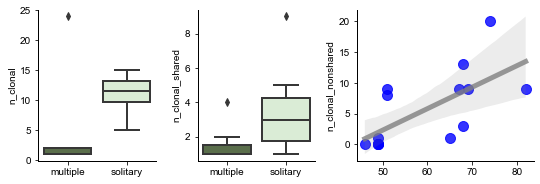

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from scipy.stats import mannwhitneyu, normaltest, pearsonr
pvalues = [
    mannwhitneyu ( df_vis11[ df_vis11["clinical"] == "multiple" ]["n_clonal"].tolist(), df_vis11[ df_vis11["clinical"] == "solitary" ]["n_clonal"].tolist(), alternative="two-sided").pvalue,
    mannwhitneyu ( df_vis11[ df_vis11["clinical"] == "multiple" ]["n_clonal_shared"].tolist(), df_vis11[ df_vis11["clinical"] == "solitary" ]["n_clonal_shared"].tolist(), alternative="two-sided").pvalue
]
pvalues = np.round (pvalues, 2)
print ( pvalues )
correlation_coefficient, p_value = pearsonr( df_vis11 ["age"], df_vis11 ["n_clonal_nonshared"] )
print ( "R = {}\tp-value = {}".format (round (correlation_coefficient, 2) , round ( p_value, 3) ) )

plt.rcParams["font.family"] = 'arial'
fig = plt.figure(figsize = (8, 3))
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 2, 3])      # Create subplots with different widths
ax =  [ plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]) ]
# fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize = (14, 5))
fig.subplots_adjust ( wspace = 0.3, bottom = 0.17, top = 0.87, left = 0.09, right = 0.95)

sns.boxplot ( df_vis11,  color = "gray", x = "clinical", y = "n_clonal",  linewidth = 2, palette=  ["#597445","#D8EFD3"],  ax = ax [0]) 
sns.boxplot ( df_vis11,  color = "darkgray", x = "clinical", y = "n_clonal_shared", linewidth = 2, palette=  ["#597445","#D8EFD3"],  ax = ax [1]) 
sns.regplot( df_vis11 , x = "age", y = "n_clonal_nonshared", scatter_kws={"color" : "blue", "s": 100}, line_kws={"linewidth":5, "color" : "gray", "alpha": 0.8 } , ax = ax[2])

for ax_individual in [ ax[0], ax[1], ax[2] ]:
    for axis in ['left','bottom']:
        ax_individual.spines[axis].set_linewidth( 1 )
    for axis in ['right','top']:
        ax_individual.spines[axis].set_linewidth( 0 )
    ax_individual.set_xlabel( None )

fig.savefig ( "/data/project/Meningioma/31.Clonality/clonal_relationship.pdf", dpi = 300)

<ipython-input-6-f8f29470b832>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels ( ax.get_yticklabels(), fontsize = 15, fontweight = "normal" )
<ipython-input-6-f8f29470b832>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [ i.get_text() for i in ax.get_yticklabels()] , fontdict = {"fontsize": 15, "fontweight" : "semibold" } )


Text(0.5, 0, '')

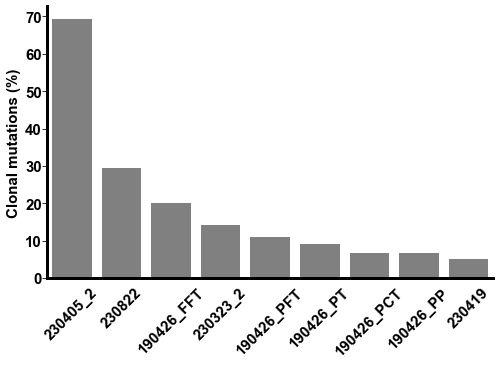

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots( nrows = 1, ncols = 1, figsize = (8, 5))
sns.barplot ( df_vis2.sort_values ( by = "n_clonal_percentage", ascending = False ).reset_index ( drop = True),
             color = "gray",
              x = "Sample_ID", y = "n_clonal_percentage", ax = ax ) 


sns.despine ( top = True, right = True, ax = ax )
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth( 3 )
ax.set_xlabel( None )

ax.set_yticklabels ( ax.get_yticklabels(), fontsize = 15, fontweight = "normal" ) 

ax.set_xticklabels( [ i.get_text() for i in ax.get_xticklabels()] , fontdict = {"fontsize": 15, "fontweight" : "semibold" } )  
ax.set_yticklabels( [ i.get_text() for i in ax.get_yticklabels()] , fontdict = {"fontsize": 15, "fontweight" : "semibold" } )  

ax.tick_params (axis = 'x', rotation = 45,  bottom=False, top=False  )
ax.tick_params (axis = 'y', pad = 0, length = 5  )

ax.set_ylabel( "Clonal mutations (%)", fontsize = 15, fontweight = "semibold" )
ax.set_xlabel( "", fontsize = 15, fontweight = "semibold" )

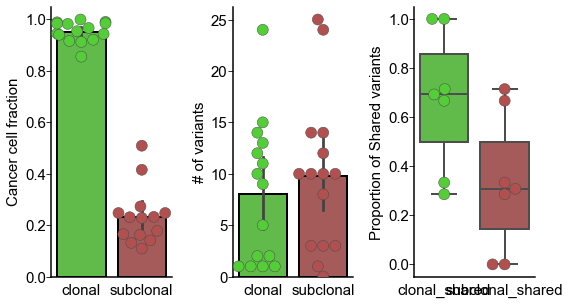

In [8]:


#####################################################################################################################################
        
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = 'arial'
tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

# colorlist = [ "#059212", "#06D001", "#bde0fe"]
# sns.set_palette(sns.color_palette(colorlist))


fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize = (8, 5))
fig.subplots_adjust ( wspace = 0.5, bottom = 0.15, top = 0.9, left = 0.14, right = 0.98)


sns.swarmplot( data = df_vis1, x = "classification", y = "ccf", hue = "classification", size = 11,  linewidth = 0.5, edgecolor = 'gray',  palette =  ["#54CE37","#B24F4F"], ax = ax[0])
sns.barplot( data = df_vis1, x = "classification", y = "ccf", linewidth = 2, edgecolor = 'black', alpha = 1, palette=   ["#54CE37","#B24F4F"], ax = ax[0])

sns.swarmplot( data = df_vis1, x = "classification", y = "n", hue = "classification", size = 11,  linewidth = 0.5, edgecolor = 'gray',  palette= ["#54CE37","#B24F4F"], ax = ax[1])
sns.barplot( data = df_vis1, x = "classification", y = "n",  linewidth = 2, edgecolor = 'black', alpha = 1,  palette= ["#54CE37","#B24F4F"], ax = ax[1])

sns.boxplot( data = df_vis3, x = "classification", y = "shared_contribution",    linewidth = 2,  palette= ["#54CE37","#B24F4F"],  ax = ax[2])
sns.swarmplot( data = df_vis3, x = "classification", y = "shared_contribution", hue = "classification", size = 11,    linewidth = 0.5, edgecolor = 'gray',  palette= ["#54CE37","#B24F4F"], ax = ax[2])

for ax_individual in [ax[0], ax[1], ax[2] ]:
    sns.despine ( top = True, right = True, ax = ax_individual )
    for axis in ['left','bottom']:
        ax_individual.spines[axis].set_linewidth( 1.5 )
    ax_individual.set_xlabel( None )

    ax_individual.set_yticklabels ( ax_individual.get_yticklabels(), fontsize = 15, fontweight = "normal" ) 

    ax_individual.set_xticklabels( [ i.get_text() for i in ax_individual.get_xticklabels()] , fontdict = {"fontsize": 15, "fontweight" : "normal" } )  
    ax_individual.set_yticklabels( [ i.get_text() for i in ax_individual.get_yticklabels()] , fontdict = {"fontsize": 15, "fontweight" : "normal" } )  

    ax_individual.tick_params (axis = 'x', rotation = 0,  bottom=False, top=False  )
    ax_individual.tick_params (axis = 'y', pad = 0, length = 5  )
    ax_individual.get_legend().remove()

ax[0].set_ylabel( "Cancer cell fraction", fontsize = 15, fontweight = "normal" )
ax[1].set_ylabel( "# of variants", fontsize = 15, fontweight = "normal" )
ax[2].set_ylabel( "Proportion of Shared variants", fontsize = 15, fontweight = "normal" )

# ax[0].yaxis.set_label_coords( -0.11,  0.5)   # ylabel을 왼쪽으로 살짝 이동

fig.savefig ( "/data/project/Meningioma/31.Clonality/ccf_number.pdf", dpi = 300 )
fig.savefig ( "/data/project/Meningioma/41.Signature/03.by_time/03.MuSiCal/ccf_numberr.pdf", dpi = 300 )

---

In [9]:
for subdir in [ "/03.by_time/01.raw_matrix", "/03.by_time/02.X_matrix",  "/03.by_time/03.MuSiCal", "/03.by_time/04.SigProfiler" ]:
    if os.path.exists ( SIGNATURE_DIR + subdir ):
        os.system ( "rm -rf " + SIGNATURE_DIR + subdir ) 
    if not os.path.exists ( SIGNATURE_DIR + subdir ):
        os.makedirs ( SIGNATURE_DIR + subdir ) 



def MERGE_WITH_ALL ( df_acc, boo):
    if boo == True:
        import copy
        d = copy.deepcopy ( df_acc  )
        d["Sample"] = "Clonal+Subclonal"
        return ["Clonal_shared", "Clonal_nonshared", "Subclonal_nonshared", "Clonal+Subclonal"], pd.concat([df_acc, d], ignore_index = True) 
    else:
        return ["Clonal_shared", "Clonal_nonshared", "Subclonal_nonshared"], df_acc

########################################################################################################################
COLUMN_ORDER, df_acc = MERGE_WITH_ALL (df_acc, False)                  # 전체와 같이 보고 싶으면 True,  분해된 것만 보고 싶으면 False
df_acc.to_csv ( SIGNATURE_DIR + "/03.by_time/01.raw_matrix/df_acc.txt", sep = "\t",  index = False)     

In [10]:
from SigProfilerMatrixGenerator.scripts import SigProfilerMatrixGeneratorFunc as matGen

os.system ( "rm -rf " + SIGNATURE_DIR + "/03.by_time/01.raw_matrix/input " + SIGNATURE_DIR + "/03.by_time/01.raw_matrix/output " + SIGNATURE_DIR + "/03.by_time/01.raw_matrix/log " )
           
matrices = matGen.SigProfilerMatrixGeneratorFunc ( project = "Meningioma",  # project
                                                                                    reference_genome = "GRCh38",   # reference_genome
                                                                                    path_to_input_files  = SIGNATURE_DIR + "/03.by_time/01.raw_matrix",  # path_to_input_files 
                                                                                    exome = False, 
                                                                                    bed_file = None, 
                                                                                    chrom_based = False, 
                                                                                    plot = True, 
                                                                                    tsb_stat = False, 
                                                                                    seqInfo = True)
os.system ( "cp " + SIGNATURE_DIR + "/03.by_time/01.raw_matrix/output/SBS/Meningioma.SBS96.all "+
                            SIGNATURE_DIR + "/03.by_time/02.X_matrix")

Starting matrix generation for SNVs and DINUCs...There may be an issue with the formatting of your matrix file.
There may be an issue with the formatting of your matrix file.
There may be an issue with the formatting of your matrix file.
Completed! Elapsed time: 20.04 seconds.
Starting matrix generation for INDELs...There may be an issue with the formatting of your matrix file.
Completed! Elapsed time: 5.21 seconds.
Matrices generated for 3 samples with 4 errors. Total of 246 SNVs, 3 DINUCs, and 21 INDELs were successfully analyzed.


0

### 1 base 단위로 보기

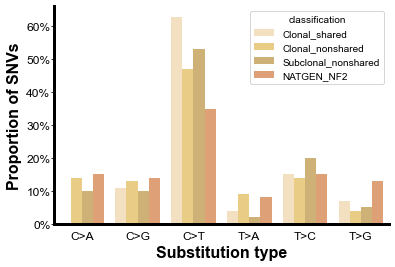

In [13]:
df_singlebase = pd.read_csv (  SIGNATURE_DIR  + "/03.by_time/01.raw_matrix/output/SBS/Meningioma.SBS6.all", sep = "\t", index_col = 0 )
df_singlebase = df_singlebase.loc [:, COLUMN_ORDER ]
NATGEN_SBS6 = "/data/project/Meningioma/41.Signature/11.PublicData/02.NatGen_whole/output/SBS/NATGEN_whole.SBS6.all"
NATGEN_SBS6 = "/data/project/Meningioma/41.Signature/11.PublicData/02.NatGen_NF2/output/SBS/NATGEN_NF2.SBS6.all"
df_singlebase_NATGEN = pd.read_csv (  NATGEN_SBS6, sep = "\t", index_col = 0 )
df_singlebase = pd.concat ( [df_singlebase, df_singlebase_NATGEN], axis = 1)

df_singlebase_percentage = round ( ( df_singlebase / df_singlebase.sum(axis=0) ) * 100 ) 
df_singlebase_percentage["MutationType"] = df_singlebase_percentage.index
df_singlebase_percentage_long = pd.melt ( df_singlebase_percentage , id_vars = "MutationType", var_name = "classification", value_name = "percent")

import matplotlib.pyplot as plt
import seaborn as sns
import palettable
import random

plt.rcParams["font.family"] = 'arial'
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize = (6, 4))

tabl = random.shuffle ( palettable.tableau.Tableau_20.mpl_colors )
vivid_10 = random.shuffle  ( palettable.cartocolors.qualitative.Vivid_10.mpl_colors )
colorlist = [  "#FBE2B9", "#F9D475", "#DBB668","#EF9C66", "red"]

sns.barplot(data = df_singlebase_percentage_long, x = 'MutationType', y = 'percent', hue = 'classification', palette = colorlist, ax = ax )

ax.set_xlabel ( "Substitution type", fontdict = {"fontsize": 16, "fontweight" : 'bold' } )
ax.set_ylabel ( "Proportion of SNVs", fontdict = {"fontsize": 16, "fontweight" : 'bold' } )
ax.set_yticklabels( [ str (round(i)) + "%" for i in ax.get_yticks()] , fontdict = {"fontsize": 12 } )  
ax.set_xticklabels( [ i.get_text() for i in ax.get_xticklabels()] , fontdict = {"fontsize": 12 } )  

ax.tick_params (axis = 'x', rotation = 0,  bottom=False, top=False  )
ax.tick_params (axis = 'y', pad = 0  )

for axis in ['left', 'bottom']:
        ax.spines[axis].set_linewidth(3)
for axis in ['right', 'top' ]:
        ax.spines[axis].set_linewidth(0)

## MuSiCal로 decompose 하기

In [29]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import time
import scipy as sp
import pickle
import musical

X = pd.read_csv( SIGNATURE_DIR + "/03.by_time/01.raw_matrix/output/SBS/Meningioma.SBS96.all", index_col=0, sep  = "\t")
X.index.name = 'Type'
X = X.loc [ musical.load_catalog('COSMIC-MuSiCal_v3p2_SBS_WGS').W.index , COLUMN_ORDER ]   # 순서를 잘 정해줄 필요가 있다

SCIENCE_SBS96 = "/data/project/Meningioma/41.Signature/11.PublicData/03.Science_whole/output/SBS/SCIENCE_WHOLE.SBS96.all"
#SCIENCE_SBS96 = "/data/project/Meningioma/41.Signature/11.PublicData/04.Science_NF2/output/SBS/SCIENCE_NF2.SBS96.all"
NATGEN_SBS96 = "/data/project/Meningioma/41.Signature/11.PublicData/01.NatGen_whole/output/SBS/NATGEN_WHOLE.SBS96.all"
#NATGEN_SBS96 = "/data/project/Meningioma/41.Signature/11.PublicData/02.NatGen_NF2/output/SBS/NATGEN_NF2.SBS96.all"

def COMBINE_NATGEN_SCIENCE ( X, boo_SCIENCE, boo_NATGEN):
    if boo_SCIENCE == True:
        X3 = pd.read_csv( SCIENCE_SBS96, index_col=0, sep  = "\t")
        X3.index.name = 'Type'
        X3 = X3.loc [ musical.load_catalog('COSMIC-MuSiCal_v3p2_SBS_WGS').W.index , : ]   # 순서를 잘 정해줄 필요가 있다
        X = pd.concat ( [X, X3], axis = 1)
    if boo_NATGEN == True:
        X2 = pd.read_csv( NATGEN_SBS96, index_col=0, sep  = "\t")
        X2.index.name = 'Type'
        X2 = X2.loc [ musical.load_catalog('COSMIC-MuSiCal_v3p2_SBS_WGS').W.index , : ]   # 순서를 잘 정해줄 필요가 있다
        X = pd.concat ( [X, X2], axis = 1)
    
    return X

X = COMBINE_NATGEN_SCIENCE  ( X, True, True )
X

,Clonal_shared,Clonal_nonshared,Subclonal_nonshared,SCIENCE_WHOLE,NATGEN_WHOLE
Type,,,,,
A[C>A]A,0,0,1,0,66
A[C>A]C,0,2,1,4,23
A[C>A]G,0,0,1,3,8
A[C>A]T,0,0,1,1,8
C[C>A]A,0,2,1,2,33
...,...,...,...,...,...
G[T>G]T,0,1,0,2,33
T[T>G]A,0,0,0,0,21
T[T>G]C,0,0,1,2,34


### 01. de novo signature discovery ( X만 있으면 됨. 5분 정도)

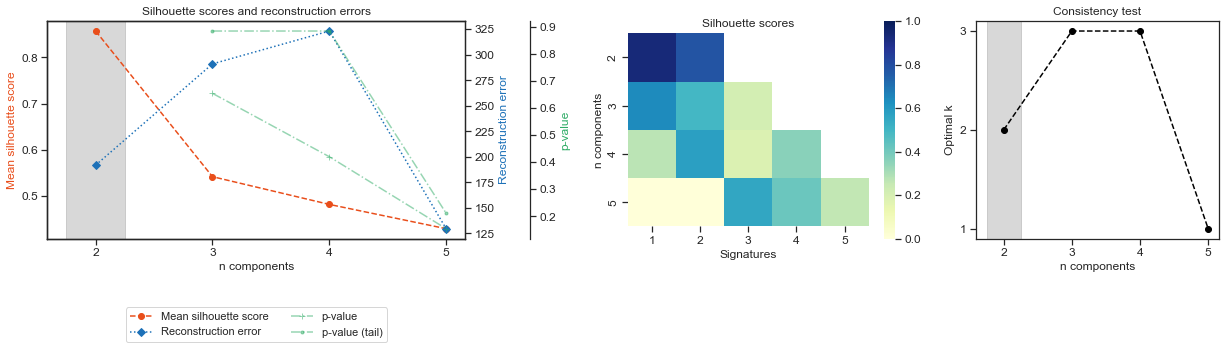

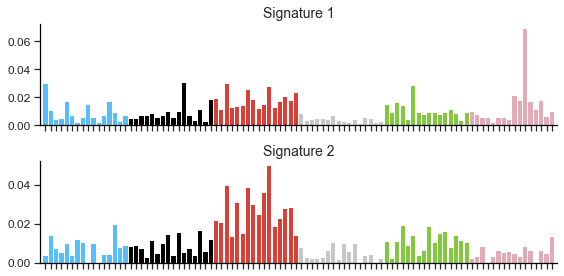

In [30]:
# 01. de novo signature discovery ( 각 n 별로 오래 걸린다 )

model = musical.DenovoSig(X, 
                          min_n_components = 2, # Minimum number of signatures to test
                          max_n_components = 5, # Maximum number of signatures to test
                          init = 'random', # Initialization method
                          method = 'mvnmf', # mvnmf or nmf
                          n_replicates = 10, # Number of mvnmf/nmf replicates to run per n_components
                          ncpu = 8, # Number of CPUs to use
                          max_iter = 10000, # Maximum number of iterations for each mvnmf/nmf run
                          bootstrap = True, # Whether or not to bootstrap X for each run
                          tol = 1e-8, # Tolerance for claiming convergence of mvnmf/nmf
                          verbose = 0, # Verbosity of output
                          normalize_X=False # Whether or not to L1 normalize each sample in X before mvnmf/nmf
                         )
model.fit()

#print(model.n_components)
#model.W_df
model.plot_selection()
fig = musical.sigplot_bar(model.W)

### 02. refitting & assignment (W를 통해 H를 구하는 과정)

In [31]:
thresh_grid = np.array([ 0.0001, 0.001, 0.01, 0.1, 0.2  ])

print ( musical.catalog.CATALOG_NAMES  )
catalog = musical.load_catalog('COSMIC-MuSiCal_v3p2_SBS_WGS')
print(catalog.show_tumor_type_options().tolist())           # Tumor에만 있는 signature로 한정하자

#1.
# TUMOR_TYPE = "CNS.GBM"
# catalog.restrict_catalog(tumor_type = TUMOR_TYPE)
# print ( "\n\n{} → {}개의 mutational context * {}개의 SBS signature\n\t\t{}".format ( TUMOR_TYPE,  catalog.W.shape[0],  catalog.W.shape[1], catalog.W.columns ) ) 
# W_catalog = catalog.W

#2.
W_catalog = catalog.W.loc [:, ["SBS1", "SBS5",  "SBS15", "SBS16", "SBS18", "SBS88", "SBS91" ]]

['COSMIC_v2_SBS_WGS', 'COSMIC_v3_SBS_WGS', 'COSMIC_v3_SBS_WES', 'COSMIC_v3p1_SBS_WGS', 'COSMIC_v3p2_SBS_WGS', 'COSMIC-MuSiCal_v3p2_SBS_WGS', 'COSMIC_v3p1_Indel', 'MuSiCal_v4_Indel_WGS']
['Biliary.AdenoCA', 'Bladder.TCC', 'Bone.Benign', 'Bone.Epith', 'Bone.Osteosarc', 'Breast.AdenoCA', 'Breast.DCIS', 'Breast.LobularCA', 'CNS.GBM', 'CNS.Medullo', 'CNS.Oligo', 'CNS.PiloAstro', 'Cervix.AdenoCA', 'Cervix.SCC', 'ColoRect.AdenoCA', 'Eso.AdenoCA', 'Head.SCC', 'Kidney.ChRCC', 'Kidney.RCC', 'Liver.HCC', 'Lung.AdenoCA', 'Lung.SCC', 'Lymph.BNHL', 'Lymph.CLL', 'Myeloid.AML', 'Myeloid.MDS', 'Myeloid.MPN', 'Ovary.AdenoCA', 'Panc.AdenoCA', 'Panc.Endocrine', 'Prost.AdenoCA', 'Skin.Melanoma', 'SoftTissue.Leiomyo', 'SoftTissue.Liposarc', 'Stomach.AdenoCA', 'Thy.AdenoCA', 'Uterus.AdenoCA']


In [32]:
# 02. refitting & assignment
model.assign_grid(W_catalog, 
                  method_assign = 'likelihood_bidirectional', # Method for performing matching and refitting
                  thresh_match_grid = thresh_grid, # Grid of threshold for matchinng
                  thresh_refit_grid = thresh_grid, # Grid of threshold for refitting
                  thresh_new_sig = 0.0, # De novo signatures with reconstructed cosine similarity below this threshold will be considered novel
                  connected_sigs = False, # Whether or not to force connected signatures to co-occur
                  clean_W_s = False # An optional intermediate step to avoid overfitting to small backgrounds in de novo signatures for 96-channel SBS signatures
                 )

In [33]:
print( model.H_s_grid[(0.1, 0.1)].iloc[:, 0:2] )
print( model.H_s_grid[(0.1, 0.01)].iloc[:, 0:2] )
print( model.H_s_grid[(0.01, 0.01)].iloc[:, 0:2] )
print( model.H_s_grid[(0.001, 0.001)].iloc[:, 0:2] )

      Clonal_shared  Clonal_nonshared
SBS5      24.076775         61.166032
      Clonal_shared  Clonal_nonshared
SBS5      24.076775         61.166032
       Clonal_shared  Clonal_nonshared
SBS1        6.543856          8.290022
SBS5       19.404926         47.319698
SBS15       0.000000          9.407081
SBS18       0.000000          0.000000
       Clonal_shared  Clonal_nonshared
SBS1        6.543856          8.340921
SBS5       19.404926         43.254886
SBS15       0.000000          8.768147
SBS18       0.000000          7.388316
SBS91       0.000000          0.000000


       Clonal_shared  Clonal_nonshared  Subclonal_nonshared  SCIENCE_WHOLE  \
SBS1       25.218356         12.310909             6.517407      16.010800   
SBS5       74.781644         63.842711            61.156920      68.712794   
SBS15       0.000000         12.941481            32.325673      13.982188   
SBS18       0.000000         10.904898             0.000000       0.000000   
SBS91       0.000000          0.000000             0.000000       1.294219   

       NATGEN_WHOLE  
SBS1       9.908174  
SBS5      77.216543  
SBS15      0.000000  
SBS18     12.875283  
SBS91      0.000000  


INFO - maxp pruned
INFO - LTSH dropped
INFO - cmap pruned
INFO - kern dropped
INFO - post pruned
INFO - PCLT dropped
INFO - GPOS pruned
INFO - GSUB pruned
INFO - JSTF dropped
INFO - DSIG dropped
INFO - name pruned
INFO - glyf pruned
INFO - Added gid0 to subset
INFO - Added first four glyphs to subset
INFO - Closing glyph list over 'GSUB': 36 glyphs before
INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'G', 'H', 'I', 'L', 'N', 'O', 'S', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'eight', 'four', 'h', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'percent', 'r', 's', 'six', 'space', 'two', 'u', 'underscore', 'zero']
INFO - Glyph IDs:   [0, 1, 2, 3, 8, 19, 20, 21, 23, 25, 27, 36, 38, 40, 42, 43, 44, 47, 49, 50, 54, 55, 58, 66, 68, 69, 70, 71, 72, 75, 79, 81, 82, 85, 86, 88]
INFO - Closed glyph list over 'GSUB': 36 glyphs after
INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'G', 'H', 'I', 'L', 'N', 'O', 'S', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'eight', 'four', 'h', 'l', 'n', 'nonmarki

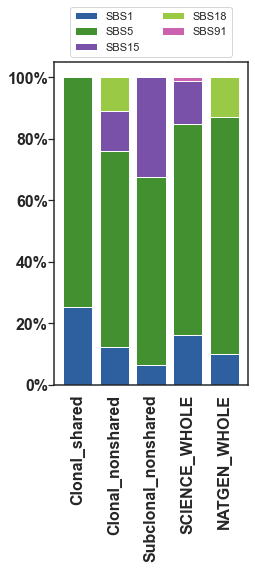

In [34]:
model.H_s_percentage = (model.H_s_grid[(0.001, 0.001)] / model.H_s_grid[(0.001, 0.001)].sum(axis=0) ) * 100
print ( model.H_s_percentage )

import matplotlib.pyplot as plt
import seaborn as sns
import palettable
import random

plt.rcParams["font.family"] = 'arial'
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize = (3.5, 8))
fig.subplots_adjust (wspace = 0.05, hspace = 0.03, bottom = 0.34, top = 0.90, left = 0.18, right = 0.95)

tabl = palettable.tableau.Tableau_20.mpl_colors [3:]
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors [3:]
colorlist = [ "#2E609F", "#439030", "#7951A9"] + vivid_10

model.H_s_percentage.T.plot( kind = 'bar', stacked = True, color = colorlist, width=0.8, ax = ax)
ax.set_xticklabels( model.H_s_percentage.columns, ha = "center",  fontdict = {"fontsize": 16, "fontweight" : 'bold' } )
ax.set_yticklabels( [ str (round(i)) + "%" for i in ax.get_yticks()] , fontdict = {"fontsize": 16, "fontweight" : 'bold' } )  

ax.tick_params (axis = 'x', rotation = 90,  bottom=False, top=False  )
ax.tick_params (axis = 'y', pad = 0  )

for axis in ['left', 'right', 'top', 'bottom']:
        ax.spines[axis].set_linewidth( 1.5 )

ax.legend( bbox_to_anchor=( 0.5 , 1), loc = 'lower center', ncol = len(model.H_s_percentage.index) / 2)

fig.savefig ( "/data/project/Meningioma/41.Signature/03.by_time/03.MuSiCal/3+NatGen.stacked.pdf", dpi = 300 )
fig.savefig ( "/data/project/Meningioma/41.Signature/Musical.all_stacked.pdf", dpi = 300 )


---

In [52]:
#. Parameter optimization with in silico validation (20분 정도로 오래 걸린다)
model.validate_grid(validate_n_replicates=1, # Number of simulation replicates to perform for each grid point
                                grid_selection_method='pvalue', # Method for selecting the best grid point
                                grid_selection_pvalue_thresh=0.05 # Threshold used for selecting the best grid point
                                )

KeyboardInterrupt: 

In [110]:
print(model.best_grid_point)   # ( model.thresh_match,  model.thresh_refit 으로 구성되어 있음 )
print(model.thresh_match)
print(model.thresh_refit)

model.W_s
model.H_s

(0.2, 0.2)
0.2
0.2
['SBS8', 'SBS37', 'SBS58', 'SBS87', 'SBS96']


In [38]:
model.H_s

AttributeError: 'DenovoSig' object has no attribute 'H_s'

In [112]:
H, model = musical.refit.refit(X, W_s, method='likelihood_bidirectional', thresh=0.2)
H.head()

,Clonal_nonshared,Clonal_shared,Subclonal_nonshared
SBS8,19.656398,0.000000,0.000000
SBS37,0.000000,22.605602,16.997038
SBS58,7.797980,0.000000,0.000000
SBS87,0.000000,0.000000,22.336724
SBS96,0.000000,31.581355,15.440546
